In [1]:
import numpy as np
from numpy import log10
import pandas as pd
import pywt
from pywt import wavedec, waverec
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from sklearn.metrics import mean_squared_error

In [2]:
# Load the EEG signal dataset from a CSV file
eeg_data = pd.read_csv('eeg_data.csv')

In [3]:
signal = eeg_data['EEG.AF3'].values

Text(0.5, 1.0, 'Original Signal')

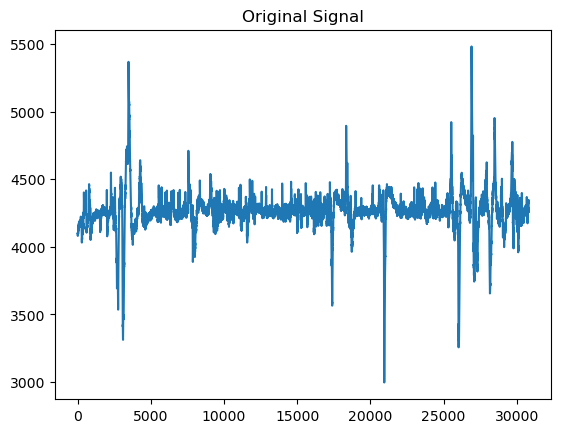

In [4]:
# Plot the noisy signal
plt.figure()
plt.plot(signal)
plt.title('Original Signal')

In [5]:
# Add Poisson noise to the signal
lambda_ = 5  # parameter of the Poisson distribution
noisy_signal = np.random.poisson(lambda_ * np.abs(signal)) * np.sign(signal)

Text(0.5, 1.0, 'Noisy signal')

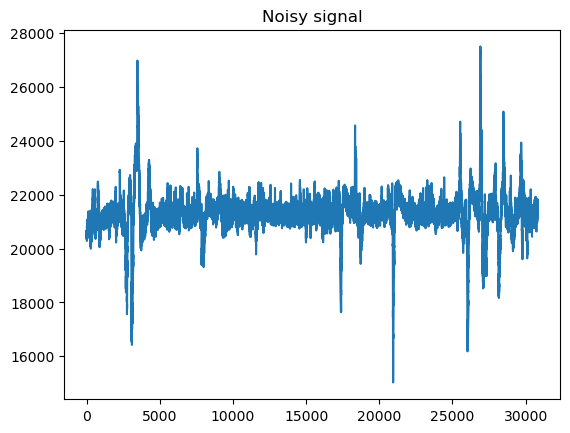

In [6]:
# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

In [7]:
# Apply a reverse bior2.6 wavelet transform to the noisy signal
coeffs = pywt.wavedec(noisy_signal, 'bior2.8', level=5)

# Set a threshold for denoising
threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(noisy_signal)))

# Apply soft thresholding to the wavelet coefficients
new_coeffs = []
for i, c in enumerate(coeffs):
    if i == 0:
        new_coeffs.append(c)
    else:
        new_coeffs.append(pywt.threshold(c, threshold, mode='soft'))

# Reconstruct the denoised signal from the wavelet coefficients
filtered_signal = pywt.waverec(new_coeffs, 'bior2.8')
filtered_signal = filtered_signal[:len(signal)]

In [8]:
mse = mean_squared_error(noisy_signal, filtered_signal)
psnr = 20 * log10(max(noisy_signal)) - 10 * log10(mse)
snr = 10 * log10(np.sum(noisy_signal**2) / np.sum((noisy_signal - filtered_signal)**2))

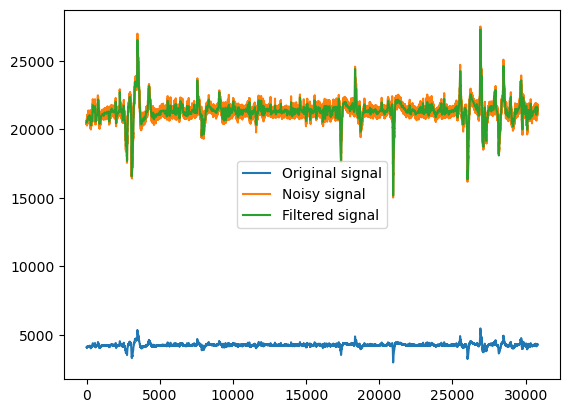

PSNR: 44.31010366028285
MSE: 28054.490622560505
SNR: 42.100159695661134


In [9]:
# Plot the original, noisy, and filtered signals
plt.plot(signal, label='Original signal')
plt.plot(noisy_signal, label='Noisy signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.legend()
plt.show()

# Print the PSNR, MSE, and SNR values
print("PSNR:", psnr)
print("MSE:", mse)
print("SNR:", snr)

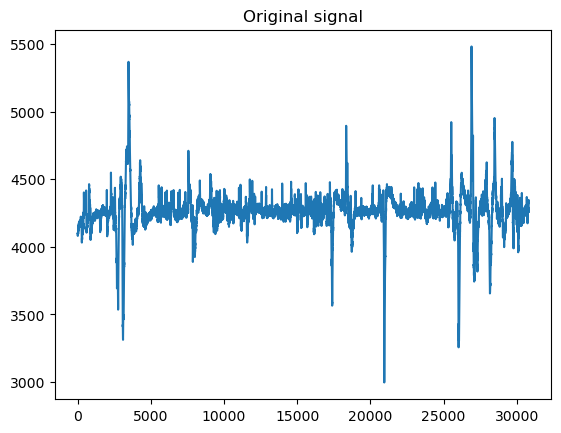

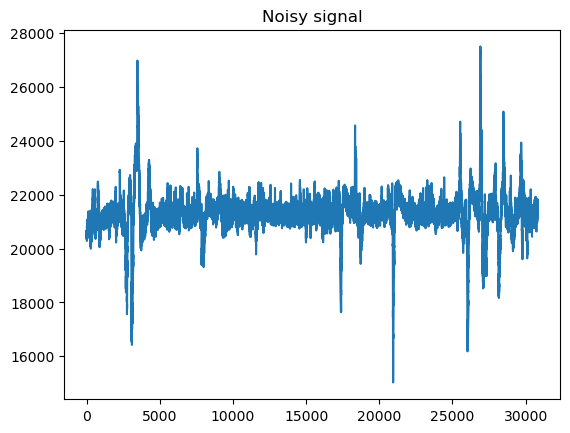

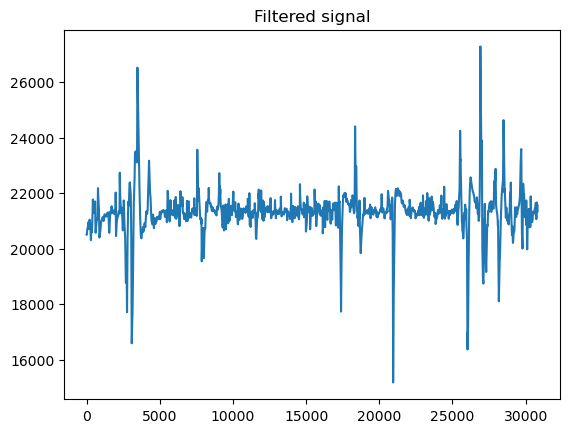

In [10]:
# Plot the original signal
plt.figure()
plt.plot(signal)
plt.title('Original signal')

# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

# Plot the filtered signal
plt.figure()
plt.plot(filtered_signal)
plt.title('Filtered signal')

# Show all the plots
plt.show()